In [3]:
tf.__version__

'2.9.1'

## 8.2 TensorFlow and Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-13 02:16:44.398864: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import load_img

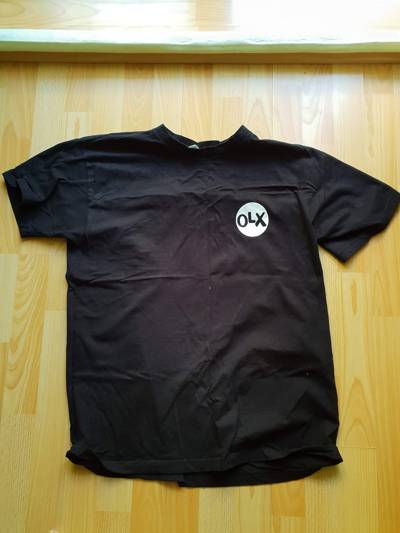

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname=f'{path}/{name}'
load_img(fullname)

In [5]:
img=load_img(fullname,target_size=(299,299))

In [6]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F52EF84F250>


In [7]:
x=np.array(img)

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
X=np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

In [11]:
X=preprocess_input(X)

In [12]:
model=Xception(weights='imagenet',input_shape=(299, 299, 3))

2023-11-13 02:16:59.932852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 02:16:59.939628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 02:16:59.940276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 02:16:59.941292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
pred=model.predict(X)

2023-11-13 02:17:05.930741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-13 02:17:06.597041: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 02:17:06.597860: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 02:17:06.597905: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-13 02:17:06.598986: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 02:17:06.599086: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
!ls

clothing-dataset-small	README.md  single-gpu-tensorflow.ipynb	Untitled.ipynb


In [19]:
train_ds=train_gen.flow_from_directory('./clothing-dataset-small/train',target_size=(150,150),batch_size=32)

Found 3068 images belonging to 10 classes.


In [20]:
!ls -l clothing-dataset-small/train

total 268
drwxrwsr-x 2 jovyan jovyan 20480 Nov  9 02:23 dress
drwxrwsr-x 2 jovyan jovyan 12288 Nov  9 02:23 hat
drwxrwsr-x 2 jovyan jovyan 36864 Nov  9 02:23 longsleeve
drwxrwsr-x 2 jovyan jovyan 20480 Nov  9 02:23 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Nov  9 02:23 pants
drwxrwsr-x 2 jovyan jovyan 24576 Nov  9 02:23 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Nov  9 02:23 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Nov  9 02:23 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Nov  9 02:23 skirt
drwxrwsr-x 2 jovyan jovyan 69632 Nov  9 02:23 t-shirt


In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
X,y=next(train_ds)

In [23]:
X.shape

(32, 150, 150, 3)

In [24]:
y.shape

(32, 10)

In [25]:
val_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds=val_gen.flow_from_directory('./clothing-dataset-small/validation',
                                   target_size=(150,150),
                                   batch_size=32,
                                   shuffle=False)

Found 341 images belonging to 10 classes.


In [26]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False


In [27]:
inputs = keras.Input(shape=(150, 150, 3))

base=base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model=keras.Model(inputs,outputs)

In [28]:
preds=model.predict(X)

1/1 [==============================] - 1s 1s/step


In [29]:
preds.shape

(32, 10)

In [30]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [31]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 167ms/step - loss: 1.2483 - accuracy: 0.6669 - val_loss: 0.8910 - val_accuracy: 0.7361
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.5882 - accuracy: 0.8204 - val_loss: 0.7882 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3815 - accuracy: 0.8686 - val_loss: 0.7829 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2141 - accuracy: 0.9221 - val_loss: 0.8873 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1922 - accuracy: 0.9332 - val_loss: 0.9487 - val_accuracy: 0.7742
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2281 - accuracy: 0.9254 - val_loss: 0.9902 - val_accuracy: 0.7713
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1123 - accuracy: 0.9606 - val_loss: 0.8773 - val_accuracy: 0.8211

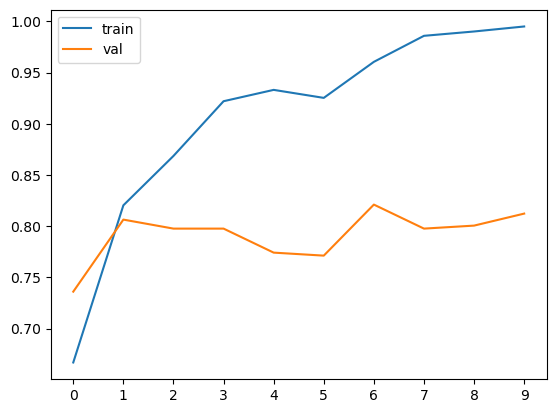

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [33]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.8727 - accuracy: 0.3726 - val_loss: 1.5836 - val_accuracy: 0.5073
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.3371 - accuracy: 0.5851 - val_loss: 1.2381 - val_accuracy: 0.6276
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 1.1056 - accuracy: 0.6525 - val_loss: 1.0646 - val_accuracy: 0.6804
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.9722 - accuracy: 0.6946 - val_loss: 0.9594 - val_accuracy: 0.7155
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8854 - accuracy: 0.7220 - val_loss: 0.8870 - val_accuracy: 0.7478
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8219 - accuracy: 0.7402 - val_loss: 0.8406 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7716 - accuracy: 0.7559 - val_loss: 0.7966 - val_accuracy:

In [43]:
del scores[0.1]
del scores[0.0001]

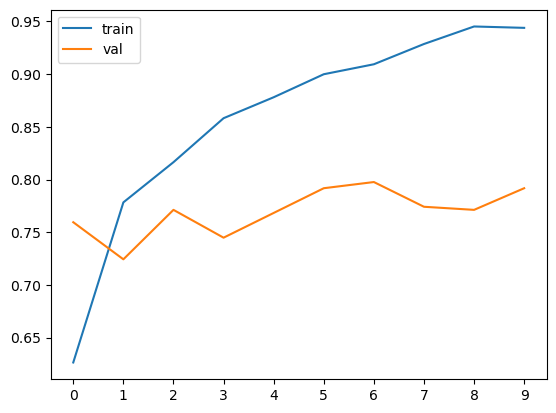

In [45]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

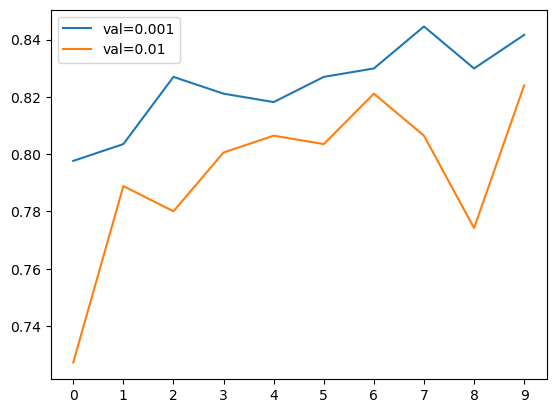

In [46]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [47]:
learning_rate = 0.001

In [48]:
model.save_weights('model_v1.h5', save_format='h5')


In [51]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [52]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 16s 138ms/step - loss: 1.0791 - accuracy: 0.6229 - val_loss: 0.7294 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6316 - accuracy: 0.7839 - val_loss: 0.6224 - val_accuracy: 0.8006
Epoch 3/10
96/96 [==============================] - 12s 129ms/step - loss: 0.5079 - accuracy: 0.8321 - val_loss: 0.5972 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4295 - accuracy: 0.8589 - val_loss: 0.5629 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 12s 129ms/step - loss: 0.3702 - accuracy: 0.8885 - val_loss: 0.5511 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3256 - accuracy: 0.9058 - val_loss: 0.5506 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 128ms/step - loss: 0.2901 - accuracy: 0.9237 - val_loss: 0.5403 - val_accuracy: 0.8416

In [53]:
!ls -l

total 492124
drwxrwsr-x 6 jovyan jovyan     4096 Nov  9 02:23 clothing-dataset-small
-rw-r--r-- 1 jovyan jovyan 83716088 Nov 13 02:50 model_v1.h5
-rw-rw-r-- 1 jovyan jovyan      525 Nov  9 01:13 README.md
-rw-rw-r-- 1 jovyan jovyan     6576 Nov  9 01:13 single-gpu-tensorflow.ipynb
-rw-rw-r-- 1 jovyan jovyan   378379 Nov 13 02:54 Untitled.ipynb
-rw-r--r-- 1 jovyan jovyan 83963856 Nov 13 02:53 xception_v1_01_0.777.h5
-rw-r--r-- 1 jovyan jovyan 83963856 Nov 13 02:53 xception_v1_02_0.801.h5
-rw-r--r-- 1 jovyan jovyan 83963856 Nov 13 02:54 xception_v1_03_0.815.h5
-rw-r--r-- 1 jovyan jovyan 83963856 Nov 13 02:54 xception_v1_05_0.824.h5
-rw-r--r-- 1 jovyan jovyan 83963856 Nov 13 02:55 xception_v1_07_0.842.h5


In [54]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [55]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.4549 - accuracy: 0.5098 - val_loss: 1.0587 - val_accuracy: 0.6422
Epoch 2/10
96/96 [==============================] - 12s 126ms/step - loss: 0.8746 - accuracy: 0.7141 - val_loss: 0.7929 - val_accuracy: 0.7331
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6907 - accuracy: 0.7761 - val_loss: 0.7031 - val_accuracy: 0.7507
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5777 - accuracy: 0.8136 - val_loss: 0.6512 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5026 - accuracy: 0.8318 - val_loss: 0.5888 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.4288 - accuracy: 0.8683 - val_loss: 0.5847 - val_accuracy: 0.7830
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3813 - accuracy: 0.8872 - val_loss: 0.5627 - val_accuracy: 0.7

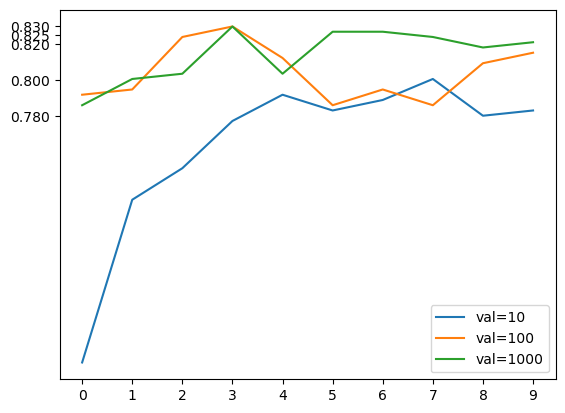

In [56]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

In [57]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [58]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 133ms/step - loss: 0.9953 - accuracy: 0.6617 - val_loss: 0.6208 - val_accuracy: 0.7742
Epoch 2/30
96/96 [==============================] - 12s 125ms/step - loss: 0.5199 - accuracy: 0.8191 - val_loss: 0.5596 - val_accuracy: 0.8211
Epoch 3/30
96/96 [==============================] - 12s 123ms/step - loss: 0.3587 - accuracy: 0.8853 - val_loss: 0.5531 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 12s 125ms/step - loss: 0.2533 - accuracy: 0.9241 - val_loss: 0.5426 - val_accuracy: 0.8123
Epoch 5/30
96/96 [==============================] - 12s 124ms/step - loss: 0.1864 - accuracy: 0.9462 - val_loss: 0.5919 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 12s 125ms/step - loss: 0.1447 - accuracy: 0.9593 - val_loss: 0.6105 - val_accuracy: 0.7977
Epoch 7/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0947 - accuracy: 0.9817 - val_loss: 0.5956 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0168 - accuracy: 0.9980 - val_loss: 0.7331 - val_accuracy: 0.8299
Epoch 29/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.6853 - val_accuracy: 0.8358
Epoch 30/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0181 - accuracy: 0.9961 - val_loss: 0.7605 - val_accuracy: 0.8094


0.5
Epoch 1/30
96/96 [==============================] - 15s 133ms/step - loss: 1.2837 - accuracy: 0.5649 - val_loss: 0.7562 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 0.8382 - accuracy: 0.7148 - val_loss: 0.6564 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 12s 124ms/step - loss: 0.6872 - accuracy: 0.7585 - val_loss: 0.6073 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.6084 - accuracy: 0.7826 - val_loss: 0.5691 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 126ms/step - loss: 0.6986 - accuracy: 0.7190 - val_loss: 0.5731 - val_accuracy: 0.8328
Epoch 26/30
96/96 [==============================] - 12s 125ms/step - loss: 0.6866 - accuracy: 0.7389 - val_loss: 0.5745 - val_accuracy: 0.8182
Epoch 27/30
96/96 [==============================] - 12s 125ms/step - loss: 0.6981 - accuracy: 0.7269 - val_loss: 0.5689 - val_accuracy: 0.8182
Epoch 28/30
96/96 [==============================] - 12s 126ms/step - loss: 0.7008 - accuracy: 0.7223 - val_loss: 0.5415 - val_accuracy: 0.8182
Epoch 29/30
96/96 [==============================] - 12s 124ms/step - loss: 0.6686 - accuracy: 0.7409 - val_loss: 0.5809 - val_accuracy: 0.8006
Epoch 30/30
96/96 [==============================] - 12s 125ms/step - loss: 0.6525 - accuracy: 0.7471 - val_loss: 0.5680 - val_accuracy: 0.8182




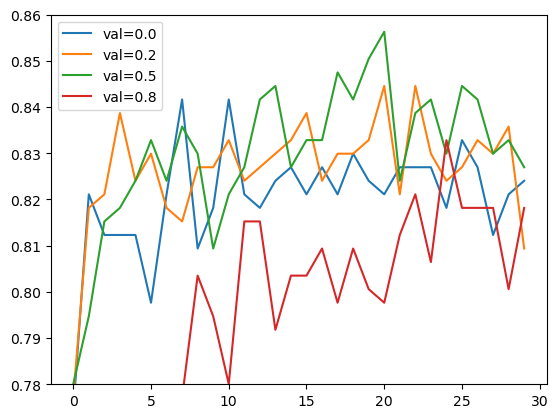

In [59]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

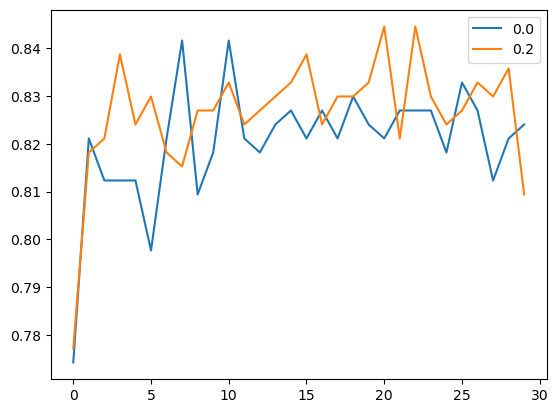

In [60]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

In [61]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [62]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 16s 134ms/step - loss: 1.0752 - accuracy: 0.6239 - val_loss: 0.6705 - val_accuracy: 0.7801
Epoch 2/50
96/96 [==============================] - 12s 123ms/step - loss: 0.6002 - accuracy: 0.7904 - val_loss: 0.6302 - val_accuracy: 0.7947
Epoch 3/50
96/96 [==============================] - 12s 123ms/step - loss: 0.4586 - accuracy: 0.8341 - val_loss: 0.5456 - val_accuracy: 0.8152
Epoch 4/50
96/96 [==============================] - 12s 123ms/step - loss: 0.3653 - accuracy: 0.8765 - val_loss: 0.5586 - val_accuracy: 0.8123
Epoch 5/50
96/96 [==============================] - 12s 123ms/step - loss: 0.2825 - accuracy: 0.9061 - val_loss: 0.5443 - val_accuracy: 0.8094
Epoch 6/50
96/96 [==============================] - 12s 124ms/step - loss: 0.2310 - accuracy: 0.9228 - val_loss: 0.5397 - val_accuracy: 0.8123
Epoch 7/50
96/96 [==============================] - 12s 122ms/step - loss: 0.1709 - accuracy: 0.9492 - val_loss: 0.5251 - val_accuracy: 0.8240

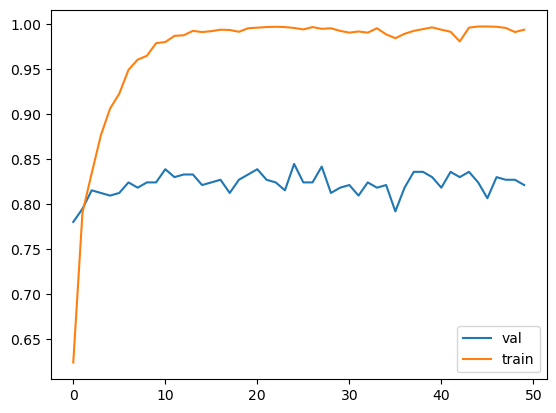

In [63]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [64]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [65]:
input_size = 299

In [66]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [68]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [69]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 76s 749ms/step - loss: 1.0069 - accuracy: 0.6861 - val_loss: 0.5671 - val_accuracy: 0.8387
Epoch 2/50
96/96 [==============================] - 69s 717ms/step - loss: 0.5386 - accuracy: 0.8119 - val_loss: 0.4535 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 70s 725ms/step - loss: 0.4450 - accuracy: 0.8494 - val_loss: 0.4195 - val_accuracy: 0.8768
Epoch 4/50
37/96 [==========>...................] - ETA: 37s - loss: 0.3826 - accuracy: 0.8669

KeyboardInterrupt: 

In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [72]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [73]:
model = keras.models.load_model('xception_v4_1_03_0.877.h5')


In [74]:
model.evaluate(test_ds)


12/12 [==============================] - 4s 278ms/step - loss: 0.3082 - accuracy: 0.9140


[0.30822575092315674, 0.9139785170555115]

In [75]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [76]:
img = load_img(path, target_size=(299, 299))

In [77]:
import numpy as np

In [78]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [79]:
X = preprocess_input(X)


In [80]:
pred = model.predict(X)


1/1 [==============================] - 1s 714ms/step


In [81]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [82]:
dict(zip(classes, pred[0]))

{'dress': -1.4651823,
 'hat': -2.6156962,
 'longsleeve': 0.026855351,
 'outwear': -1.1419646,
 'pants': 7.497736,
 'shirt': -0.3653394,
 'shoes': -1.2177083,
 'shorts': 3.1038098,
 'skirt': -1.3892856,
 't-shirt': -1.7786858}